In [1]:
import xarray as xr

ds = xr.open_dataset('CFS_Sample_Series.nc')
display(ds)

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 190, longitude: 384)
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-10-31 ... 2018-10-31
    step        (time) timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  (time) datetime64[ns] ...
Data variables: (12/53)
    uflx        (time, latitude, longitude) float32 ...
    vflx        (time, latitude, longitude) float32 ...
    shtfl       (time, latitude, longitude) float32 ...
    lhtfl       (time, latitude, longitude) float32 ...
    t           (time, latitude, longitude) float32 ...
    sdwe        (time, latitude, longitude) float32 ...
    ...          ...
    snohf       (time, latitude, longitude) float32 ...
    vbdsf       (time, latitude, longitude) float32 ...
    vddsf       (time, latitude, longitude) float32 ...
    nbdsf       (time, latitude, longitude) float32 ...
    nddsf       (time, latitude, longitude) float32 ...
    srweq       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-11-14T11:21 GRIB to CDM+CF via cfgrib-0.9.1...

### Filter data to just air temperature

In [2]:
ds = ds.filter_by_attrs(standard_name="air_temperature")
ds

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 190, longitude: 384)
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-10-31 ... 2018-10-31
    step        (time) timedelta64[ns] 00:00:00 06:00:00 ... 1 days 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  (time) datetime64[ns] 2018-10-31 ... 2018-11-01
Data variables:
    t           (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-11-14T11:21 GRIB to CDM+CF via cfgrib-0.9.1...

#### Clip to AOI

In [3]:
min_lon = 115
max_lon = 125
min_lat = 40 
max_lat = 50 

ds = ds.sel(latitude=slice(max_lat,min_lat),longitude=slice(min_lon,max_lon))
ds

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 190, longitude: 11)
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-10-31 ... 2018-10-31
    step        (time) timedelta64[ns] 00:00:00 06:00:00 ... 1 days 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 115.3 116.2 117.2 ... 122.8 123.7 124.7
    valid_time  (time) datetime64[ns] 2018-10-31 ... 2018-11-01
Data variables:
    t           (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-11-14T11:21 GRIB to CDM+CF via cfgrib-0.9.1...

# plot overall distribution of the series

(array([ 29., 102., 109., 115., 121.,  51.,  21.,  28.,  13.,  16.]),
 array([265.138 , 267.4855, 269.833 , 272.1805, 274.528 , 276.8755,
        279.223 , 281.5705, 283.918 , 286.2655, 288.613 ], dtype=float32),
 <BarContainer object of 10 artists>)

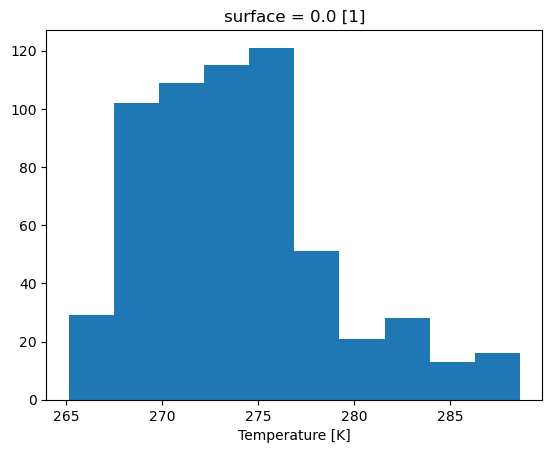

In [5]:
ds['t'].plot()

# Plot one layer of the time series

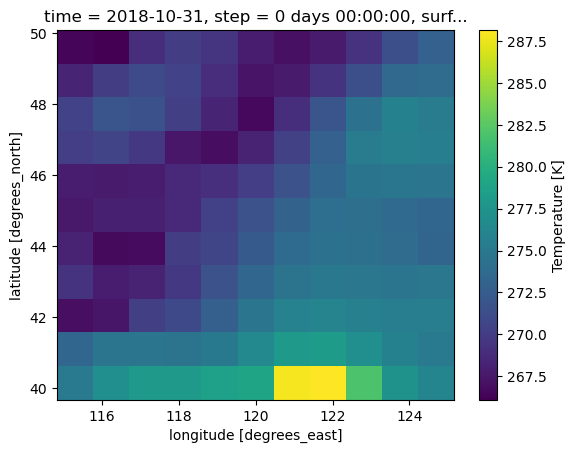

In [6]:
ds.t[0].plot()

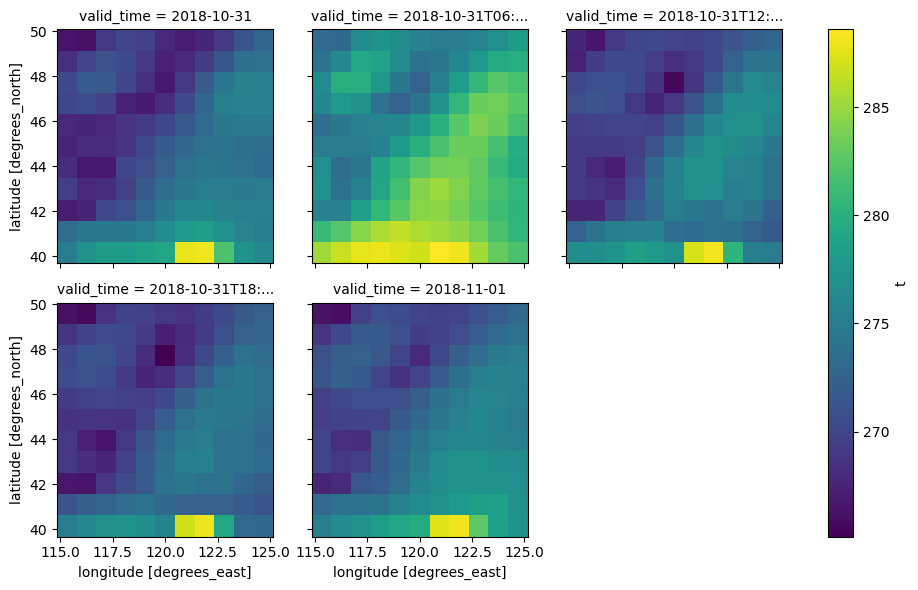

In [24]:
ds['t'].groupby('valid_time').mean(dim='time').plot(col='valid_time',col_wrap=3)

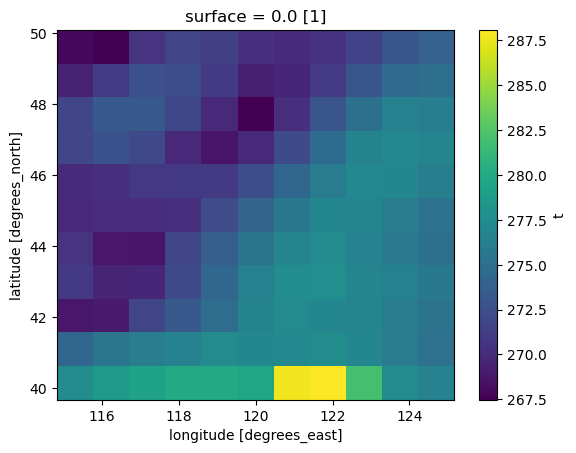

In [25]:
ds.t.mean(dim='time').plot()